In [1]:
# version 1.1
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myClassification.R")
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/mySample.R")


## Classification


In [9]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [11]:
#extracting the levels for the dataset
slevels <- levels(iris$Species)
slevels

[1] "setosa"     "versicolor" "virginica"

In [12]:
#for performance issues, you can use matrix instead of data.frame
iris <- cbind(as.matrix(iris[,1:4]), Species=iris$Species)

## Building samples (training and testing)

In [13]:
# preparing dataset for random sampling
set.seed(1)
sr <- sample_random()
sr <- train_test(sr, iris)
iris_train = sr$train
iris_test = sr$test

[1] "sample_random"


ERROR: Error in prepare.default(model, iris_train): unused argument (iris_train)


In [14]:
tbl <- rbind(table(iris[,"Species"]), 
             table(iris_train[,"Species"]), 
             table(iris_test[,"Species"]))
rownames(tbl) <- c("dataset", "training", "test")
head(tbl)

,1,2,3
dataset,50,50,50
training,39,38,43
test,11,12,7


## General function for testing classification methods

In [15]:
train_test <- function(model, iris_train, iris_test) {
  print(class(model)[1])
  
  model <- prepare(model, iris_train)
  train_prediction <- action(model, iris_train)
  
  iris_train_predictand = decodeClassLabels(iris_train[,"Species"])
  train_eval <- evaluation.classification(iris_train_predictand, train_prediction)
  print(train_eval$metrics)
  plot(roc_curve(train_eval))
  
  test_prediction <- action(model, iris_test)
  
  iris_test_predictand = decodeClassLabels(iris_test[,"Species"])
  test_eval <- evaluation.classification(iris_test_predictand, test_prediction)
  print(test_eval$metrics)
  plot(roc_curve(test_eval))
}


## Majority class baseline prediction (Zero Rule)

Model creating and level of adjustment during training

[1] "classification_majority"


Loading required package: RSNNS

Loading required package: Rcpp

classification_majority,prepare.classification_majority,0.002,

Loading required package: Matrix

Loading required package: nnet

Loading required package: MLmetrics


Attaching package: 'MLmetrics'


The following object is masked from 'package:base':

    Recall




   accuracy        f1 sensitivity specificity precision    recall
1 0.5722222 0.3583333   0.3583333   0.6791667 0.3583333 0.3583333


Loading required package: ROCR



   accuracy        f1 sensitivity specificity precision    recall
1 0.4888889 0.2333333   0.2333333   0.6166667 0.2333333 0.2333333


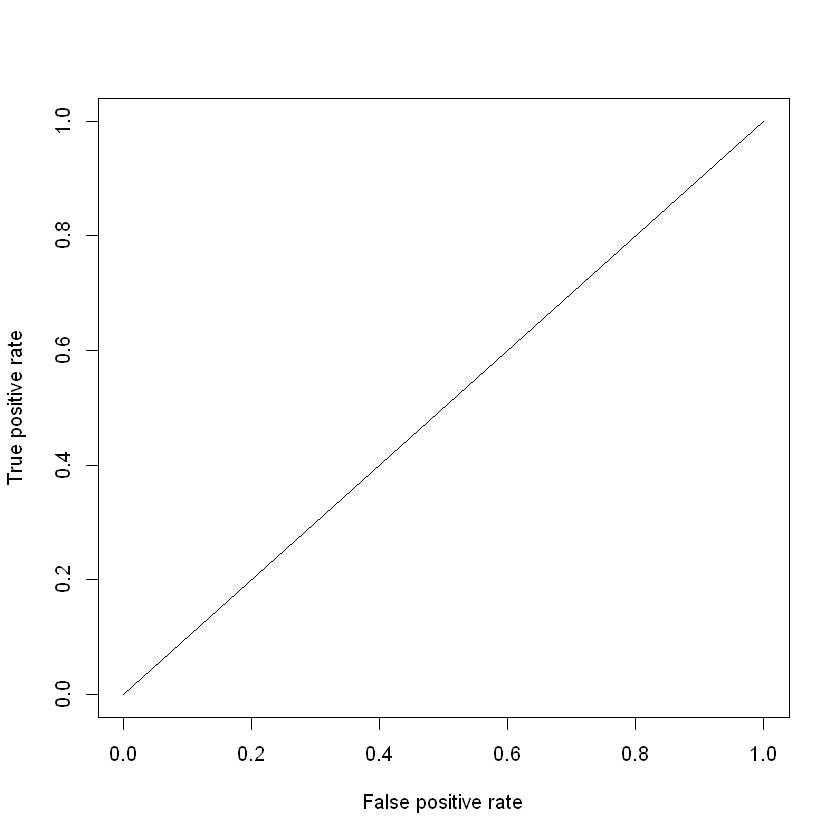

In [16]:
  train_test(classification_majority("Species", slevels), iris_train, iris_test)

## Decision Tree
Training the model, presenting the level of adjustment, quality of prediction, and confusion matrix.

[1] "classification_dtree"


Loading required package: tree

classification_dtree,prepare.classification_dtree,0.001,



   accuracy    f1 sensitivity specificity precision recall
1 0.9833333 0.975       0.975      0.9875     0.975  0.975
   accuracy        f1 sensitivity specificity precision    recall
1 0.9777778 0.9666667   0.9666667   0.9833333 0.9666667 0.9666667


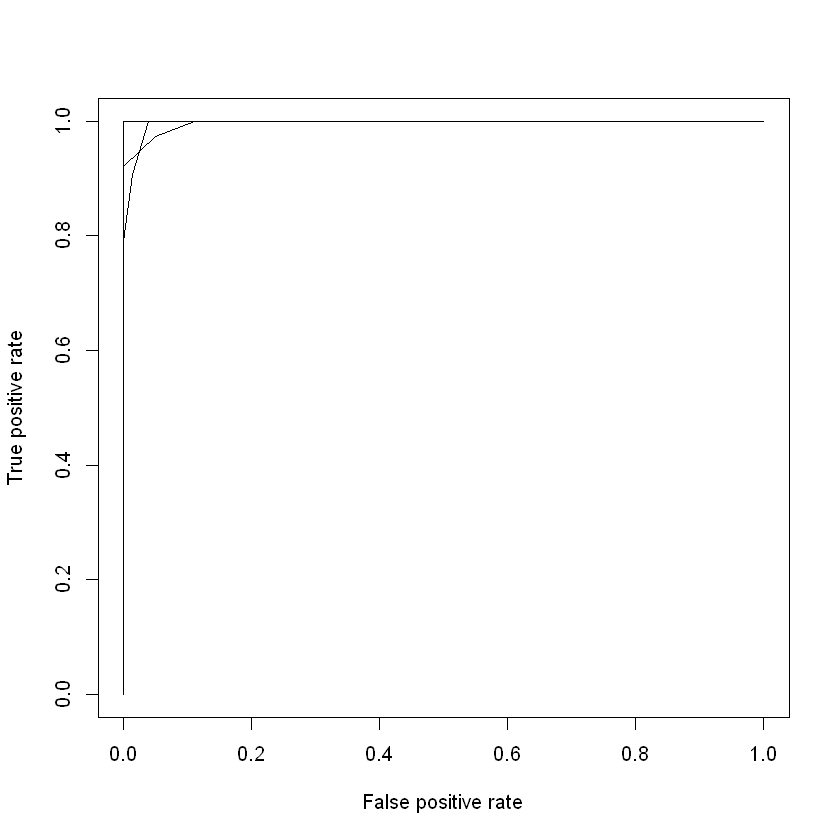

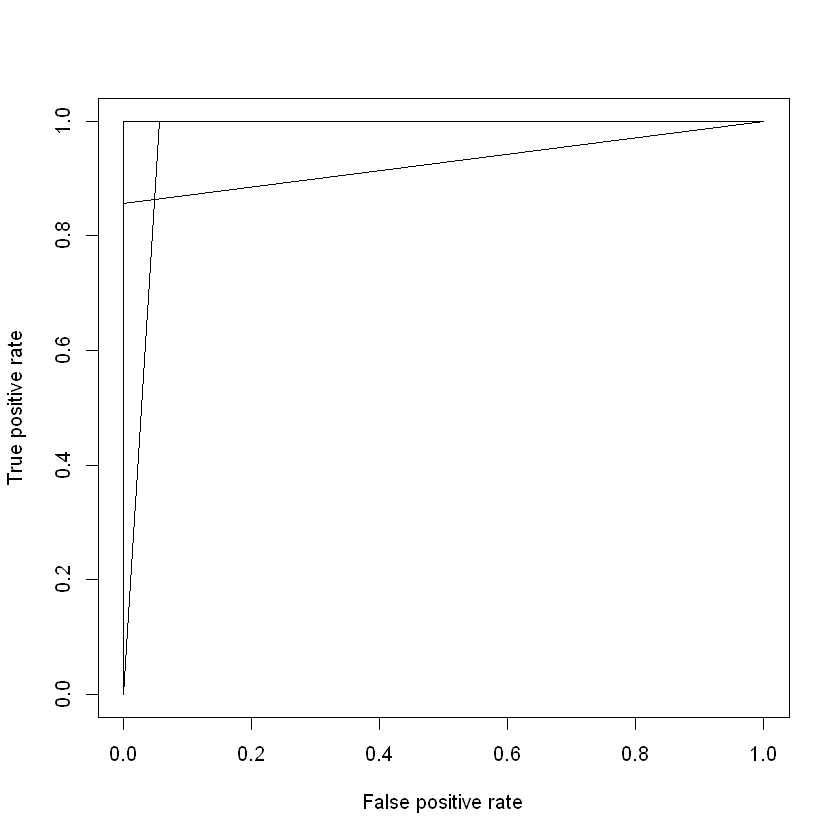

In [17]:
train_test(classification_dtree("Species", slevels), iris_train, iris_test)

## Naive Bayes

[1] "classification_nb"


Loading required package: e1071

classification_nb,prepare.classification_nb,0.002,



   accuracy        f1 sensitivity specificity precision    recall
1 0.9722222 0.9583333   0.9583333   0.9791667 0.9583333 0.9583333
   accuracy        f1 sensitivity specificity precision    recall
1 0.9777778 0.9666667   0.9666667   0.9833333 0.9666667 0.9666667


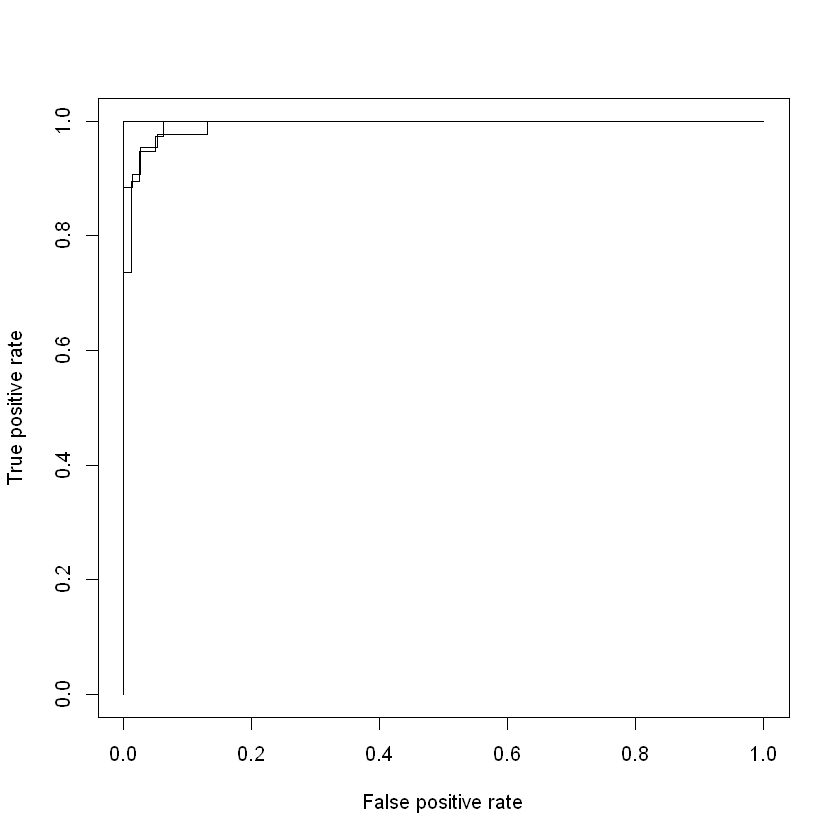

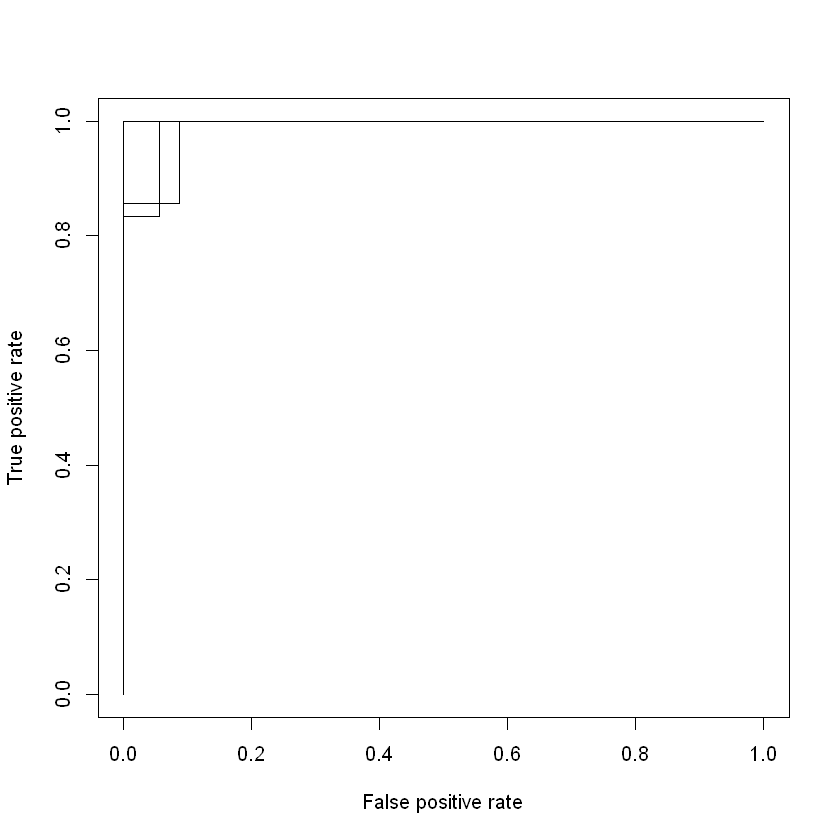

In [18]:
train_test(classification_nb("Species", slevels), 
           iris_train, iris_test)

## Random Forest

[1] "classification_rf"


Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

classification_rf,prepare.classification_rf,0.002,mtry=3,ntree=5



  accuracy f1 sensitivity specificity precision recall
1        1  1           1           1         1      1
   accuracy        f1 sensitivity specificity precision    recall
1 0.9555556 0.9333333   0.9333333   0.9666667 0.9333333 0.9333333


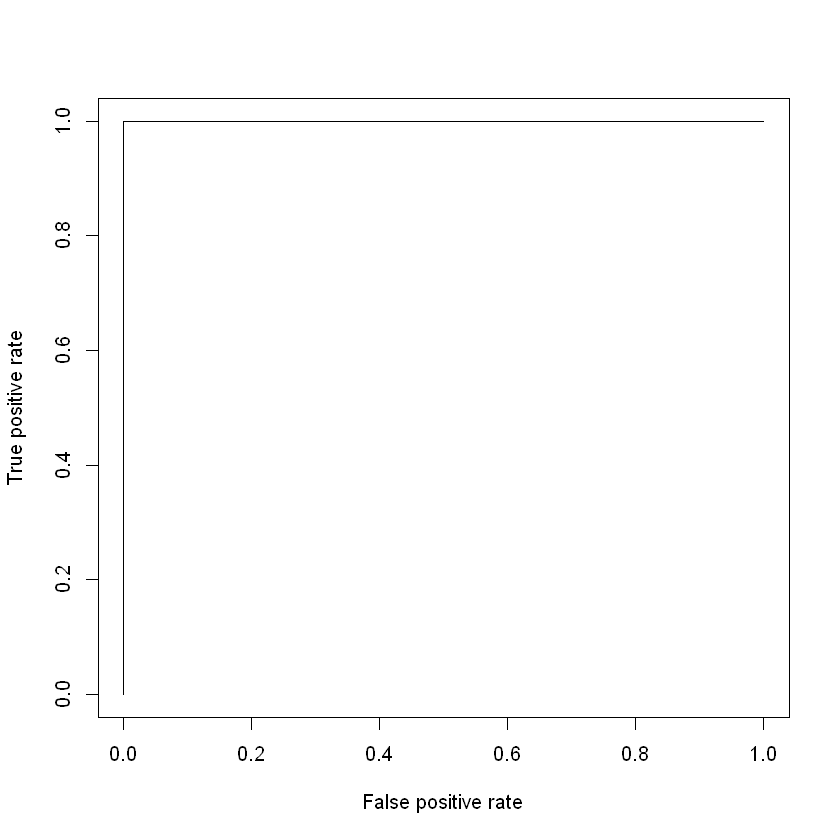

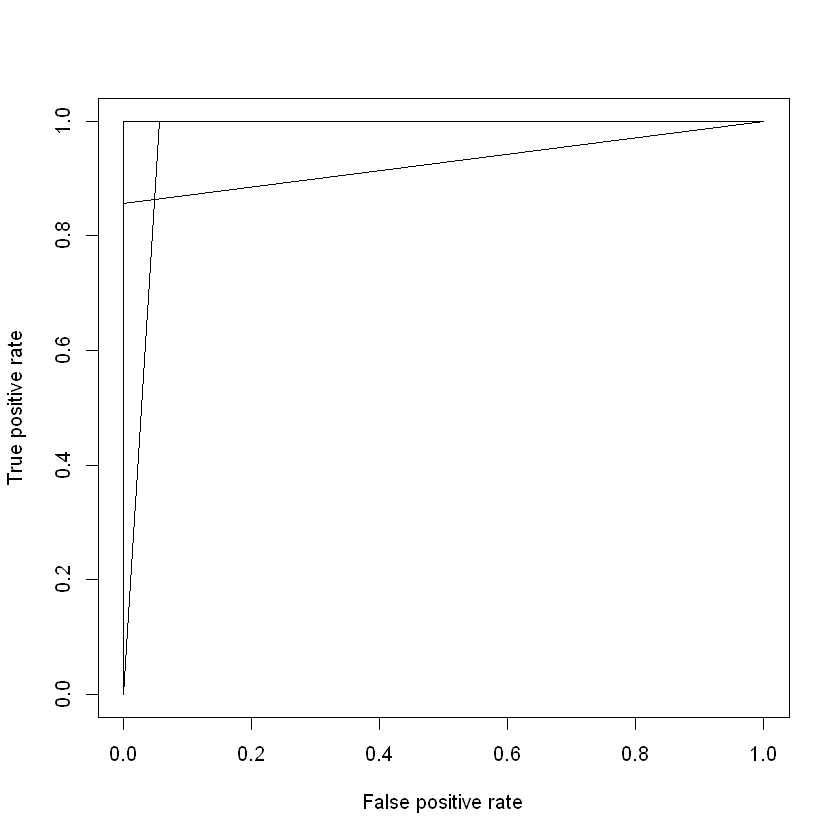

In [19]:
# do not set mtry and ntree for hyperparameter optimization
# you can also set a range for them
train_test(classification_rf("Species", slevels, mtry=3, ntree=5), 
           iris_train, iris_test)

## Neural Networks - MLP using nnet


[1] "classification_mlp"


classification_mlp,prepare.classification_mlp,0.000,size=3,decay=0.03



   accuracy        f1 sensitivity specificity precision    recall
1 0.9888889 0.9833333   0.9833333   0.9916667 0.9833333 0.9833333
   accuracy        f1 sensitivity specificity precision    recall
1 0.9777778 0.9666667   0.9666667   0.9833333 0.9666667 0.9666667


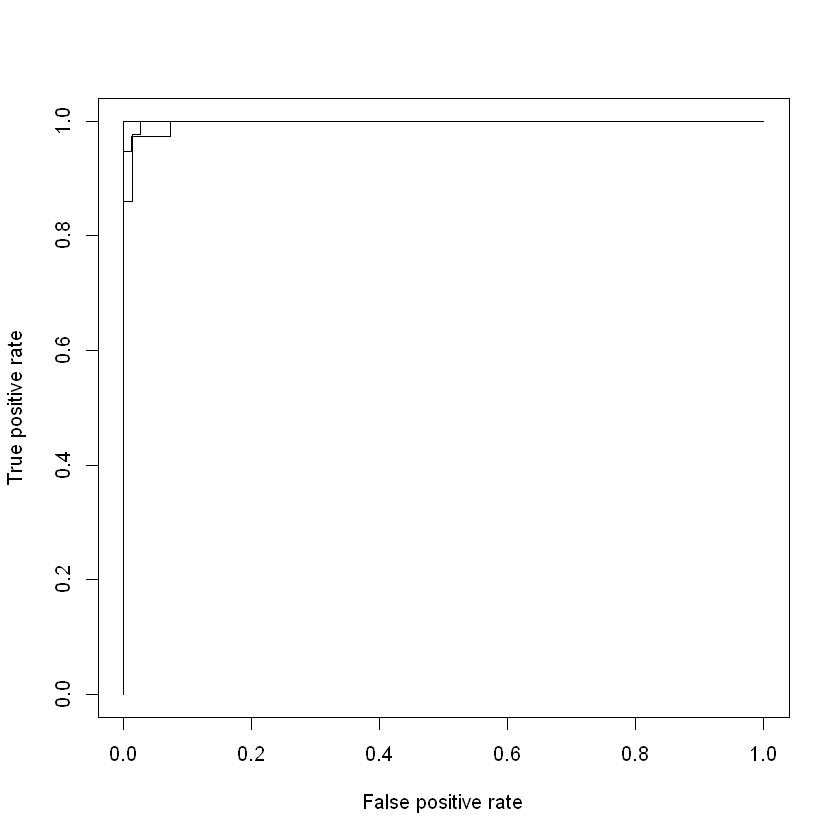

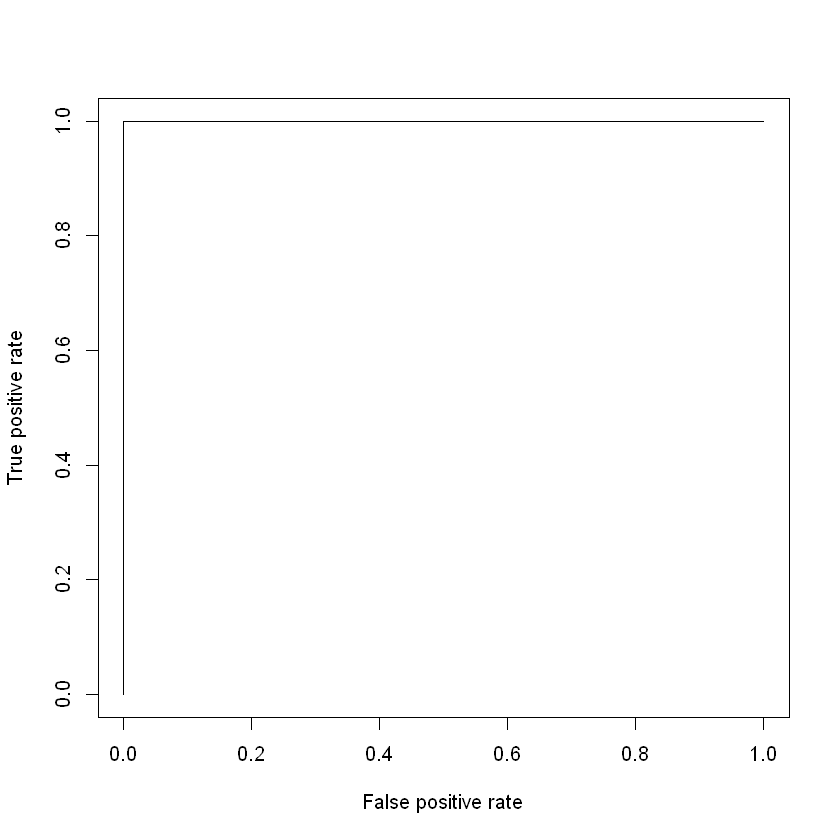

In [20]:
# do not set decay and set a range for neurons for hyperparameter optimization
# you can also set a range for them
  train_test(classification_mlp("Species", slevels, size=3,decay=0.03),
             iris_train, iris_test)

## Creating a SVM with RBF kernel

[1] "classification_svm"


classification_svm,prepare.classification_svm,0.000,epsilon=0.0,cost=20.000



   accuracy    f1 sensitivity specificity precision recall
1 0.9833333 0.975       0.975      0.9875     0.975  0.975
   accuracy        f1 sensitivity specificity precision    recall
1 0.9777778 0.9666667   0.9666667   0.9833333 0.9666667 0.9666667


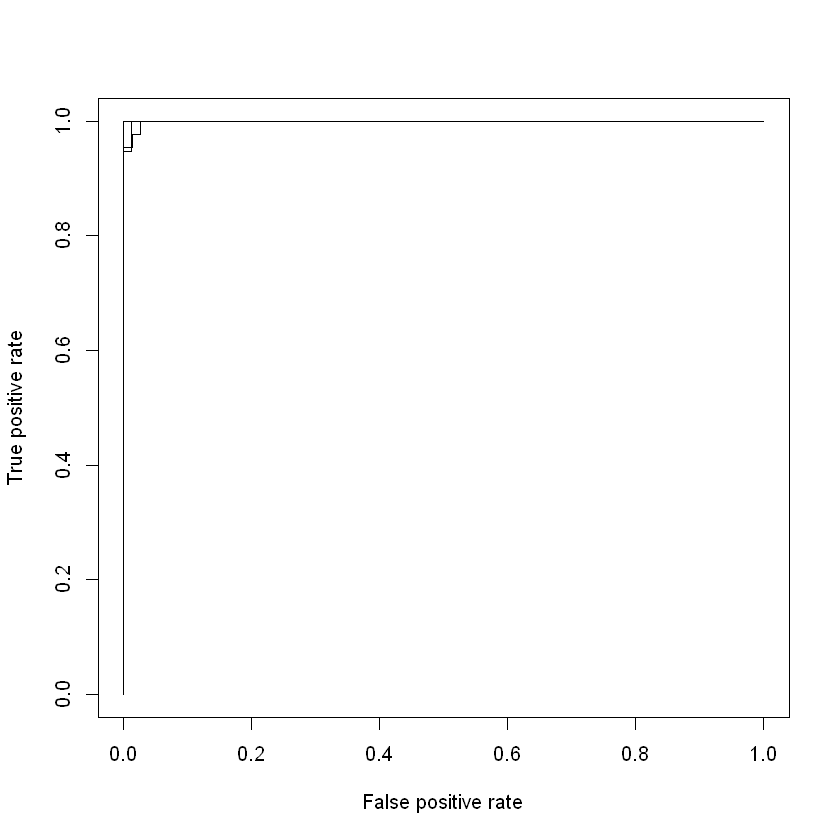

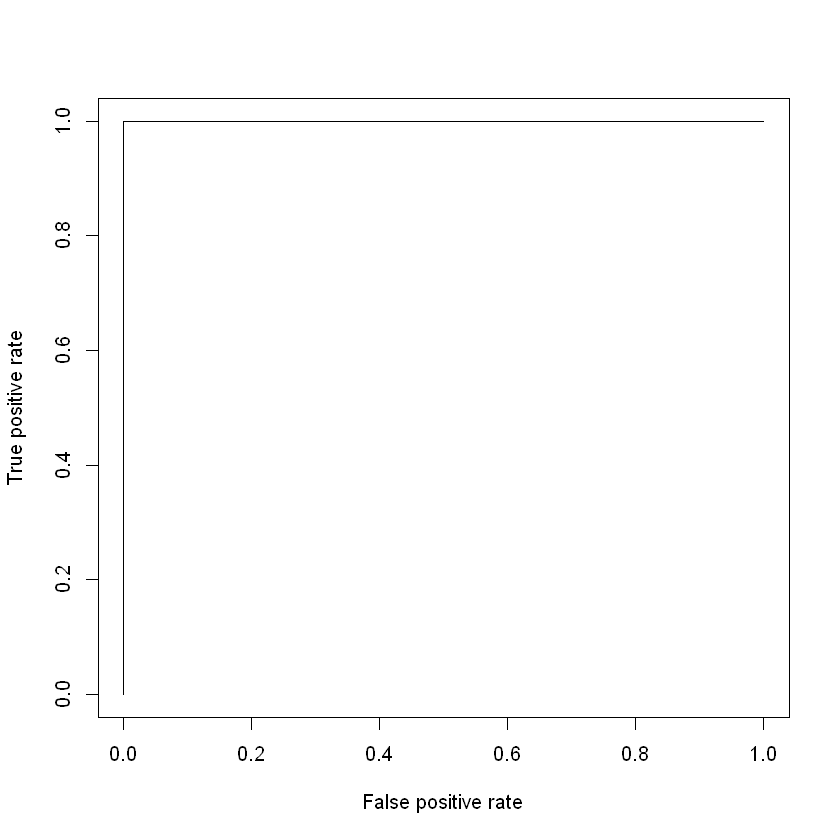

In [21]:
#do not set epsilon, cost, and  kernel for hyperparameter optimization
# you can also set a range for them
train_test(classification_svm("Species", slevels, epsilon=0.0,cost=20.000), 
           iris_train, iris_test)

## knn prediction

[1] "class_knn"


Loading required package: class

Warning message:
"package 'class' was built under R version 3.6.3"
class_knn,prepare.class_knn,0.004,



  accuracy f1 sensitivity specificity precision recall
1        1  1           1           1         1      1
   accuracy        f1 sensitivity specificity precision    recall
1 0.9555556 0.9333333   0.9333333   0.9666667 0.9333333 0.9333333


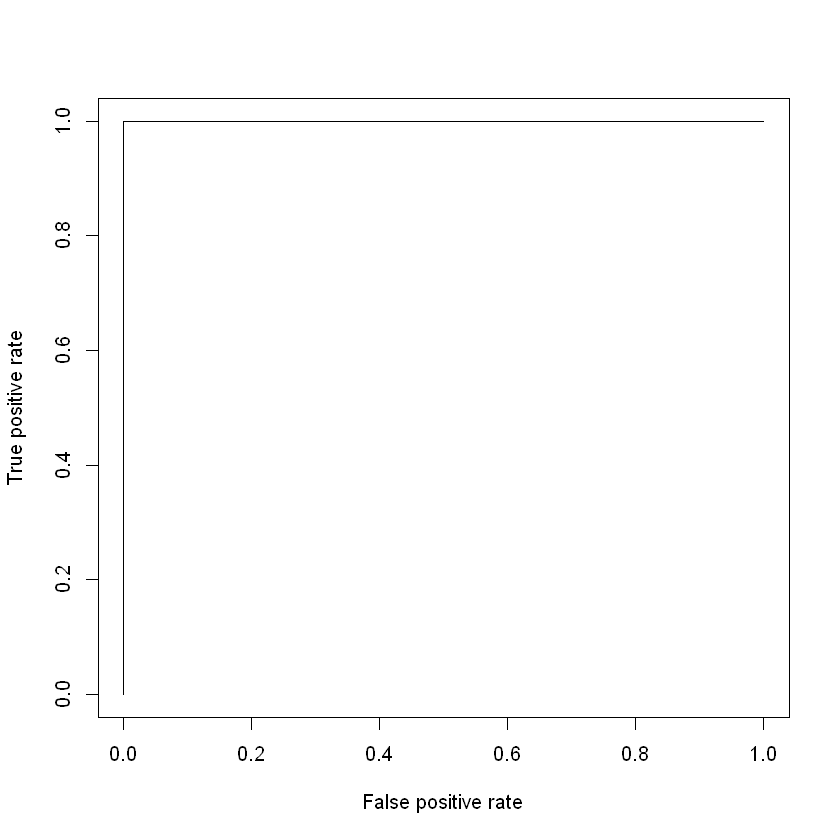

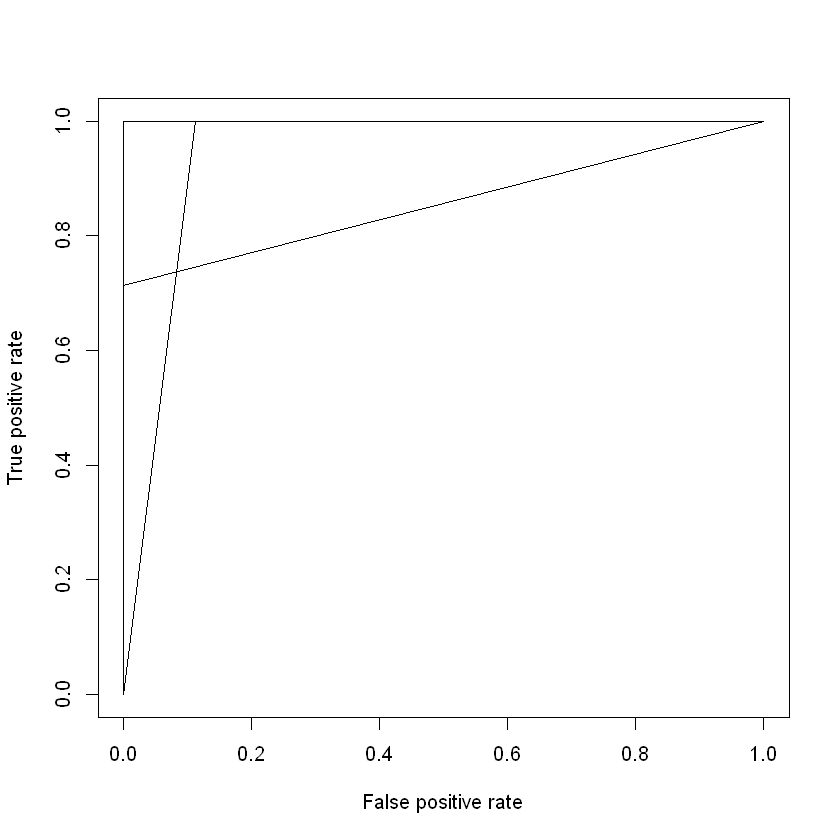

In [12]:
# do not set k for hyperparameter optimization
# you can also set a range for it
train_test(classification_knn("Species", slevels, k=1), iris_train, iris_test)

## Convolutional neural networks (CNN)

[1] "classification_cnn"


Loading required package: dplyr


Attaching package: 'dplyr'


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: tfdatasets

Loading required package: tensorflow


Attaching package: 'tensorflow'


The following object is masked from 'package:RSNNS':

    train


Loading required package: keras

classification_cnn,prepare.classification_cnn,0.174,neurons=16,epochs=150



   accuracy        f1 sensitivity specificity precision    recall
1 0.9722222 0.9583333   0.9583333   0.9791667 0.9583333 0.9583333
   accuracy        f1 sensitivity specificity precision    recall
1 0.9777778 0.9666667   0.9666667   0.9833333 0.9666667 0.9666667


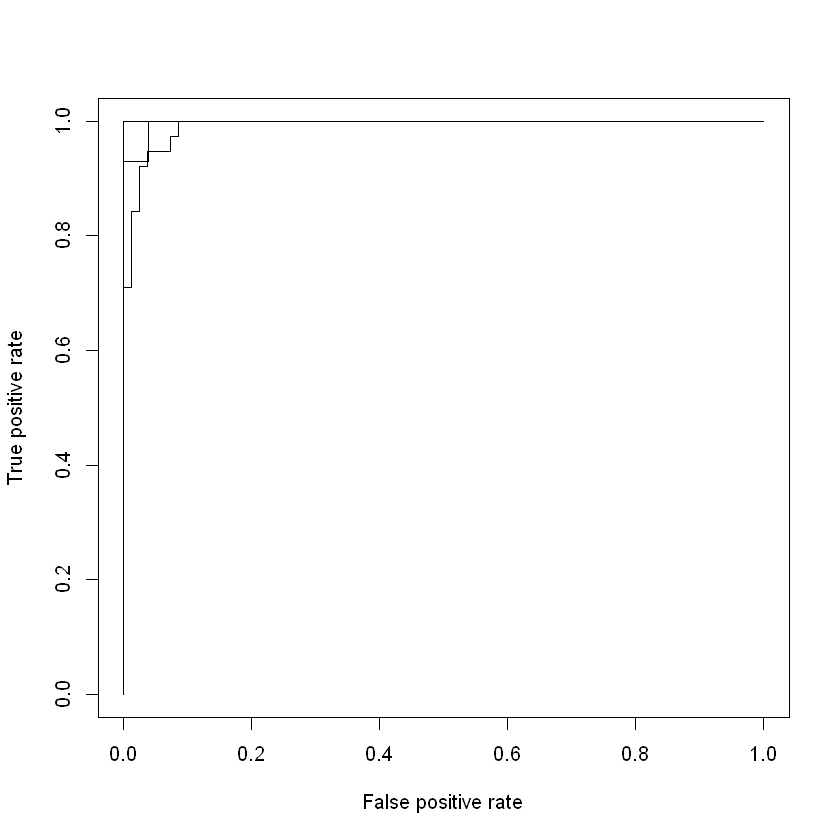

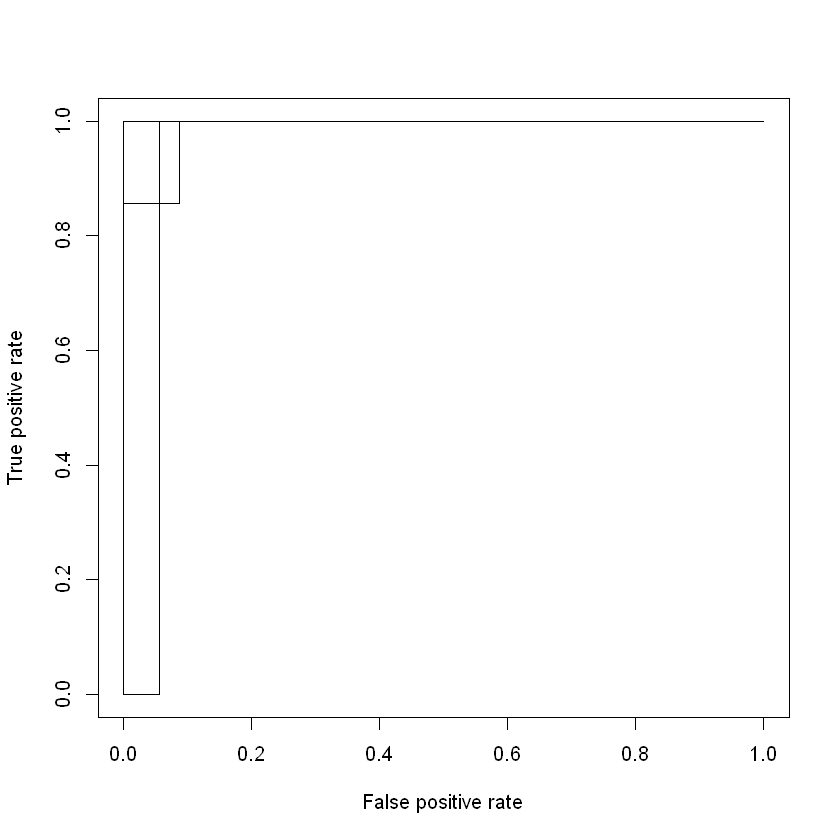

In [22]:
# do not set neurons and epochs for hyperparameter optimization
# you can also set a range for them
train_test(classification_cnn("Species", slevels, neurons=16,epochs=150), 
           iris_train, iris_test)